In [ ]:
import cv2
import numpy as np
 
img = cv2.imread('../Images/Cropped_Runway_Images/00104.png',0)
blur = cv2.GaussianBlur(img,(3,3),0)
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
laplacian1 = laplacian/laplacian.max()
cv2.imshow("R",laplacian1)
cv2.waitKey(0)

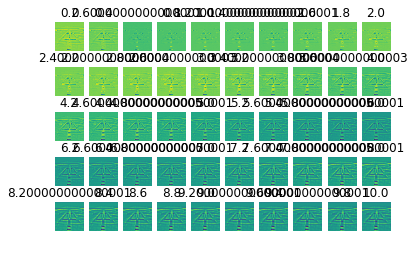

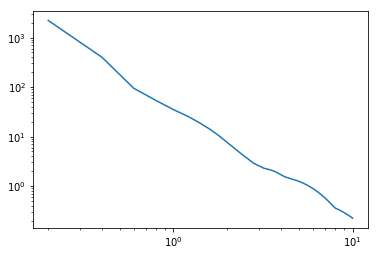

In [6]:
import cv2
import numpy as np
def get_log_kernel(siz, std):
    # This creates a LoG filter
    x = y = np.linspace(-siz, siz, 2*siz+1)
    x, y = np.meshgrid(x, y)
    arg = -(x**2 + y**2) / (2*std**2)
    h = np.exp(arg)
    h[h < sys.float_info.epsilon * h.max()] = 0
    h = h/h.sum() if h.sum() != 0 else h
    h1 = h*(x**2 + y**2 - 2*std**2) / (std**4)
    return h1 - h1.mean()


import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

filename = '../Images/Cropped_Runway_Images/00104.png'
img = cv2.imread(filename,0)

plt.close('all')

a, b = [],[]        # List to record the LoG values
ValueRange = np.linspace(0,10,51)
ValueRange = ValueRange[1:]
count = 1
NumOfRows = 5       # These are to create subplots to view the images
NumOfColumns = len(ValueRange)/NumOfRows
if NumOfColumns * NumOfRows < len(ValueRange):
    NumOfRows += 1

for i in ValueRange:
    m = cv2.filter2D(img,ddepth=cv2.CV_32F, kernel = get_log_kernel(20,i))
    a.append(i)
    b.append(m.max())
    plt.subplot(NumOfRows,NumOfColumns,count)
    plt.imshow(m)
    plt.axis('off')
    plt.title(i)
    count += 1


plt.figure()
plt.loglog(a,b)
plt.show()
